#  Multinomial Naive Bayes Model

#  1. Understanding Bayes Theorem

#### What is the probability of having that gene?
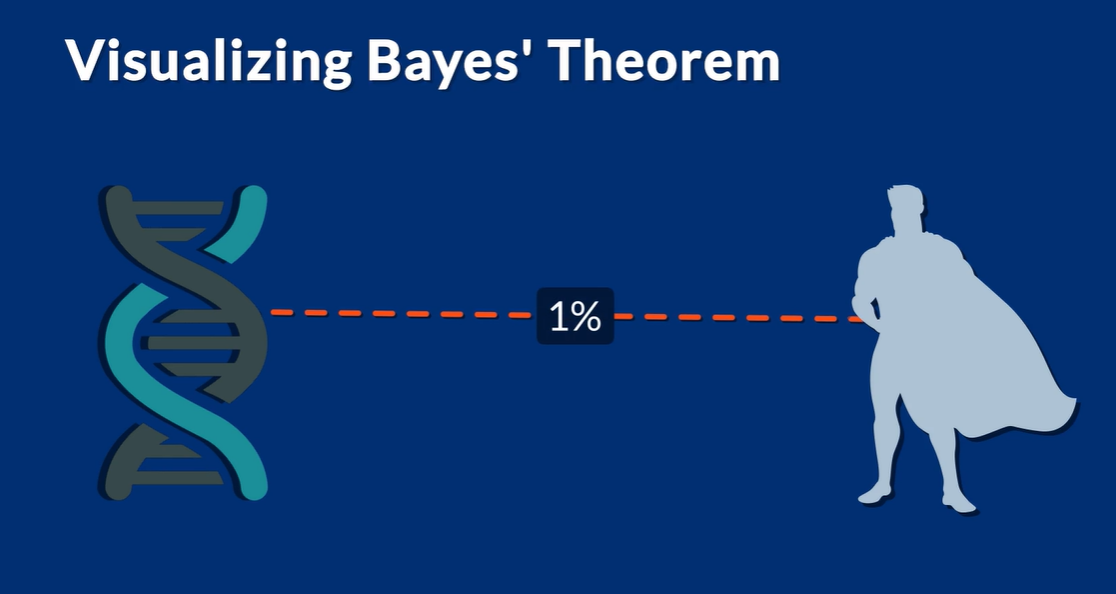

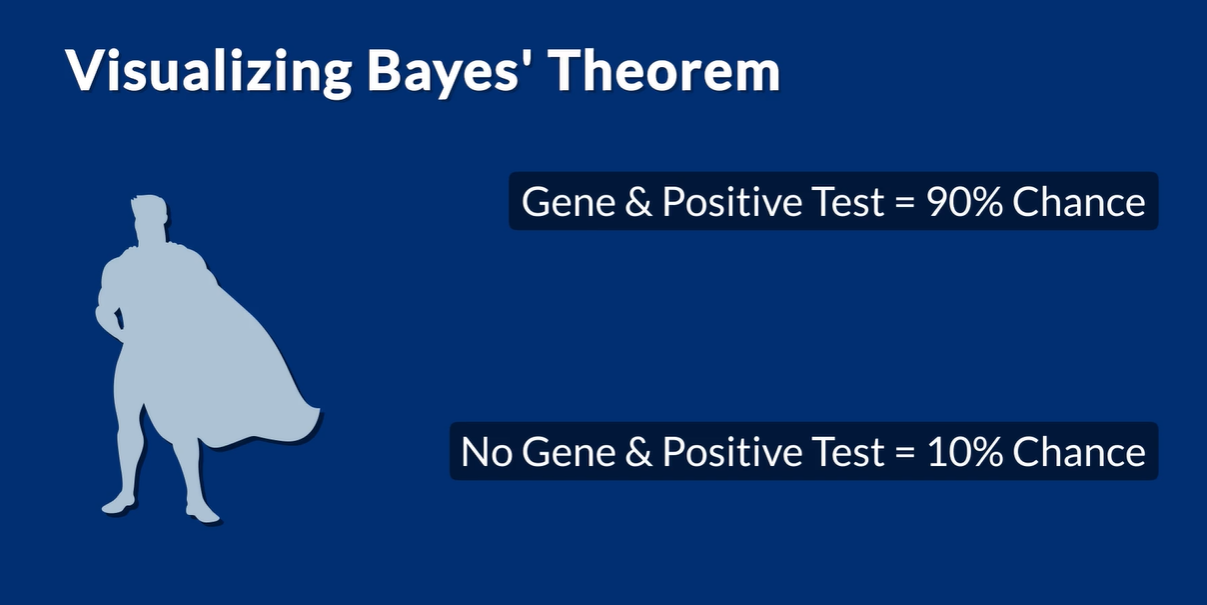

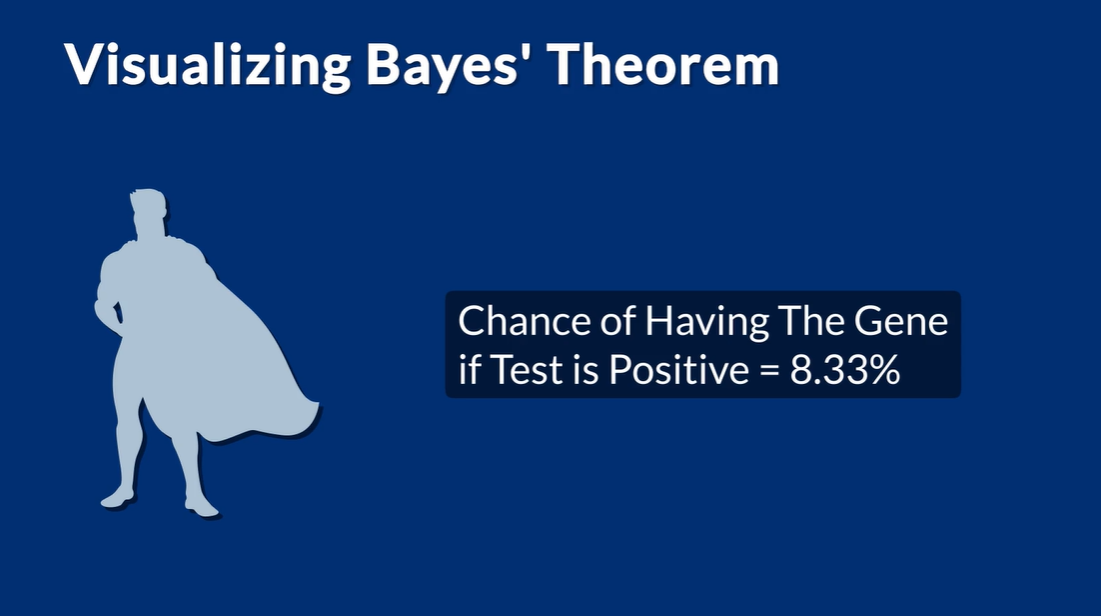

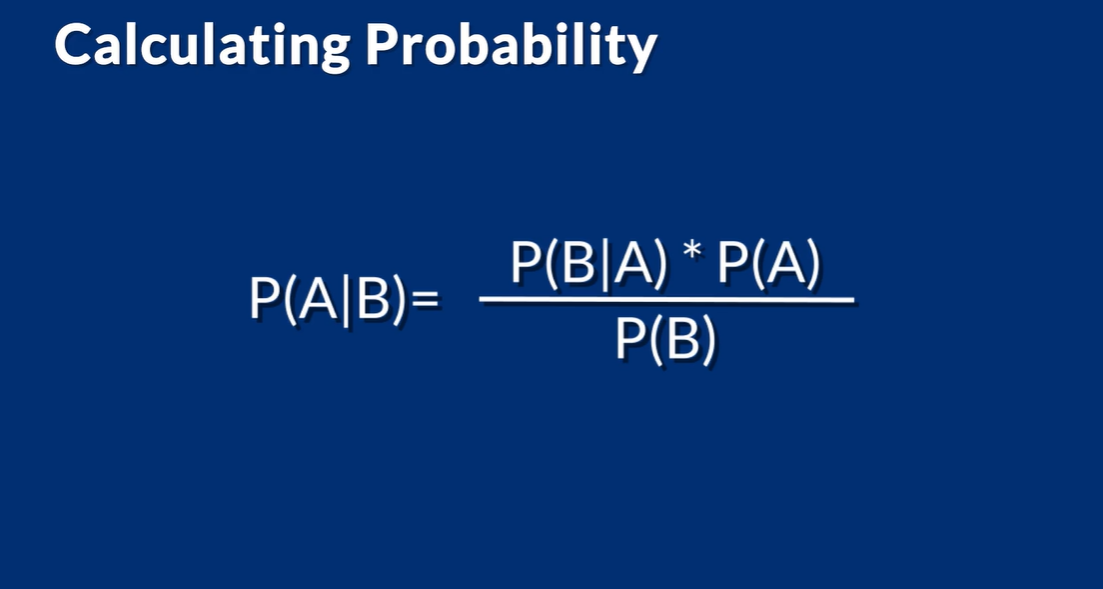

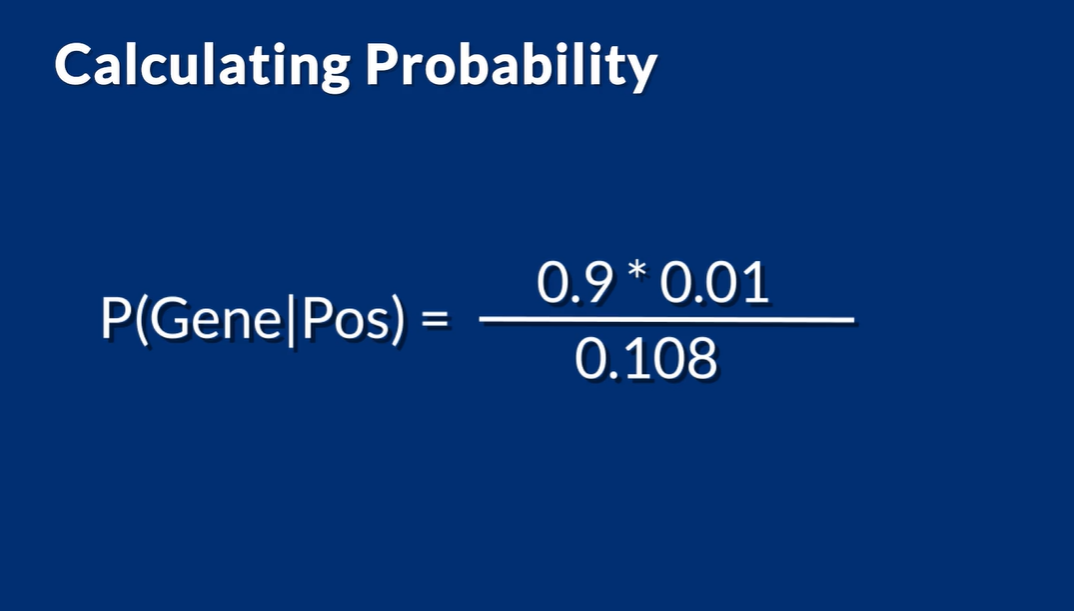

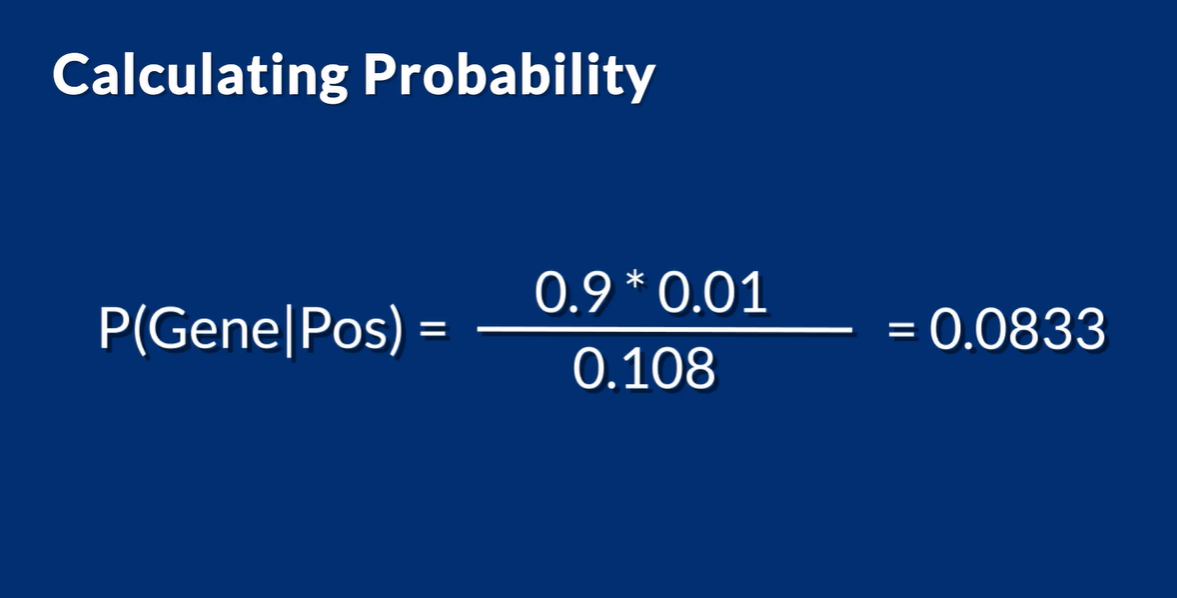

- First, we learned about conditional probability. We learned how some conditions can affect the probability of associated events.
- Second, we gained an intuitive understanding of Bayes' theorem. We learned that even a test with a high accuracy is far more likely to have a negative result if it's testing for something that's very rare.
- Third, we explored Bayes' formula and calculated that if you get a positive test result, there're still only an 8.33% chance that you have the superhuman strength gene.

# 2. Understanding Multinomial Naive Bayes

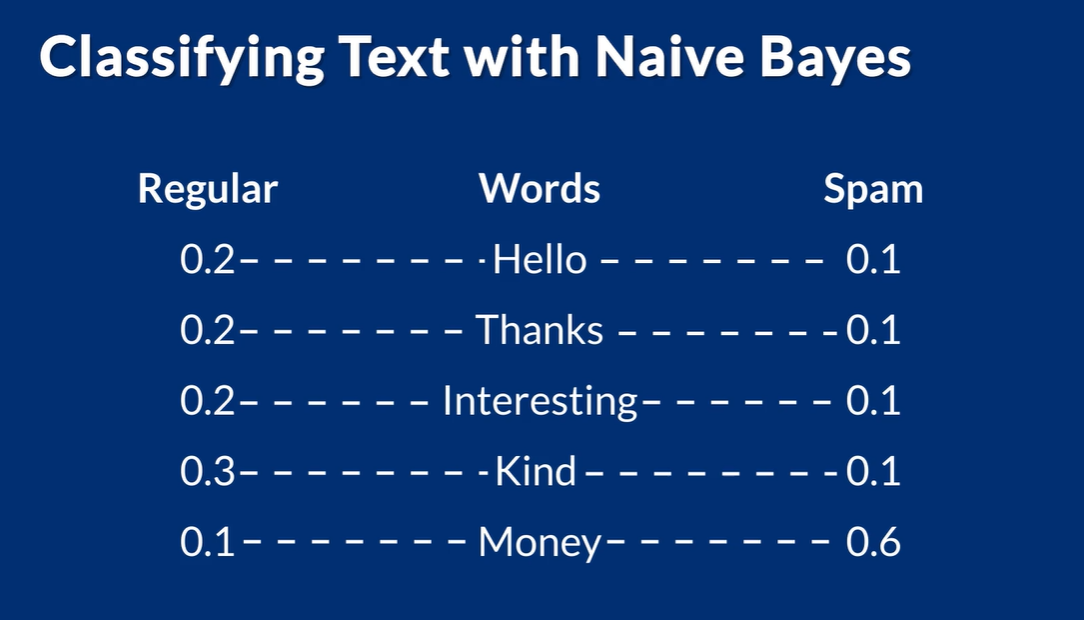

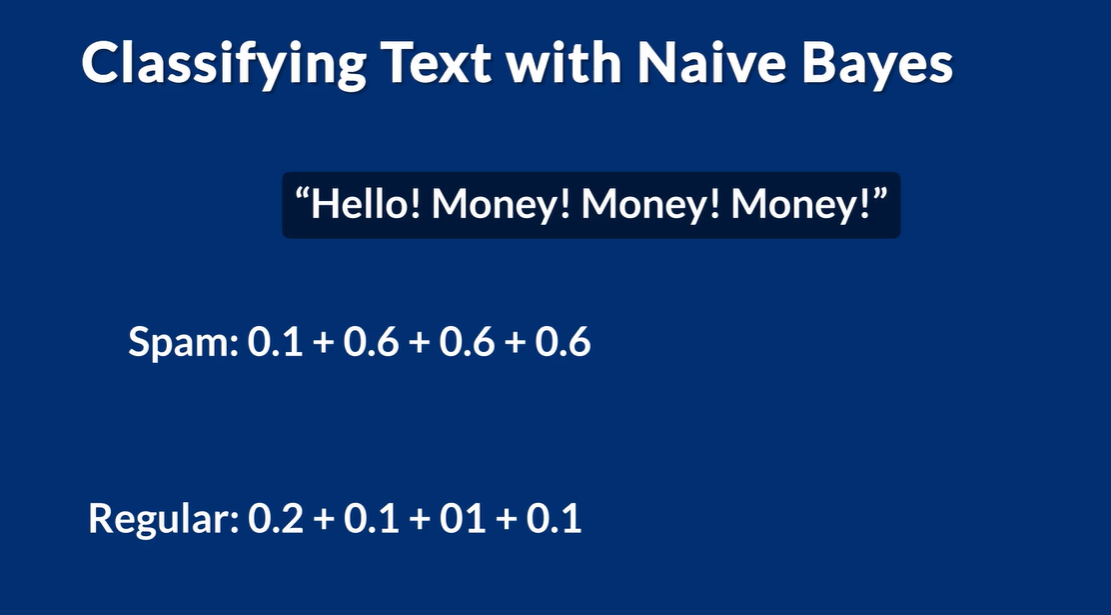

### Suppose 25% of all emails we receive are spam
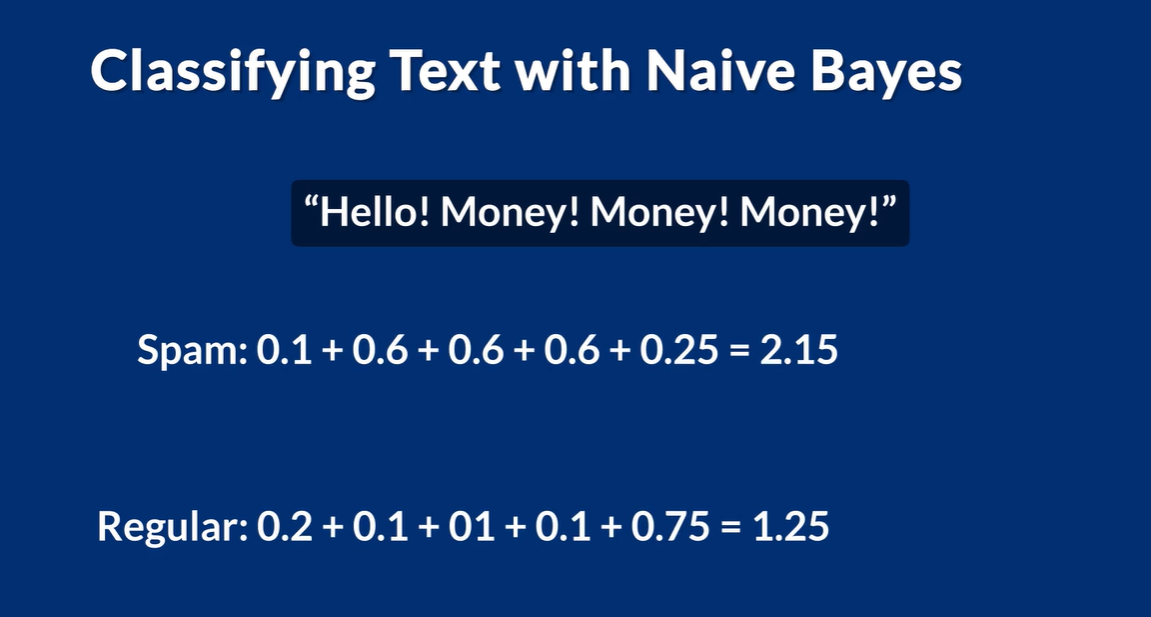

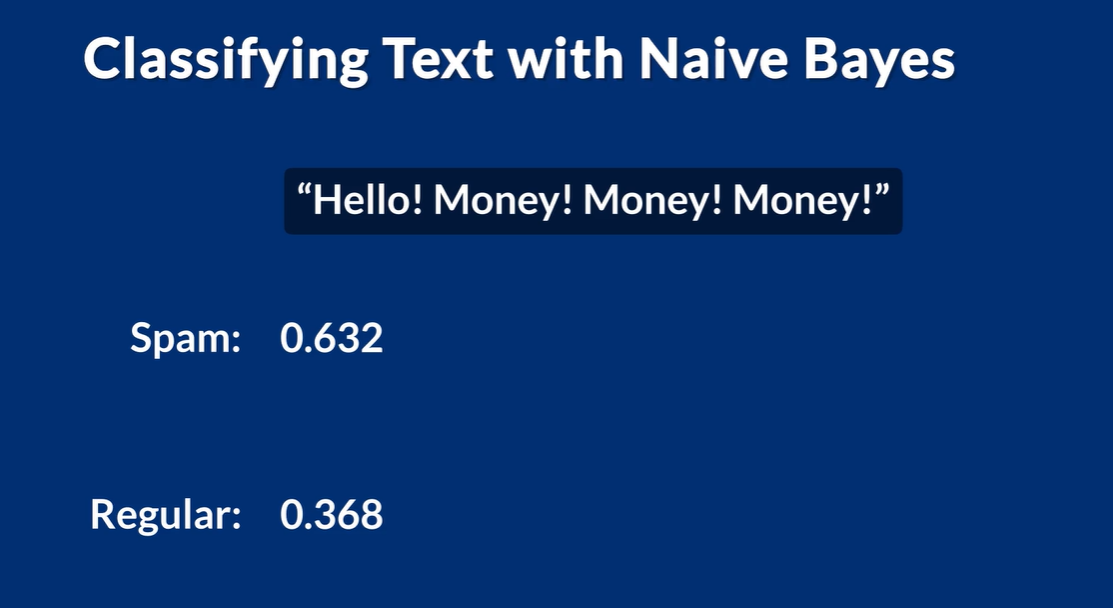

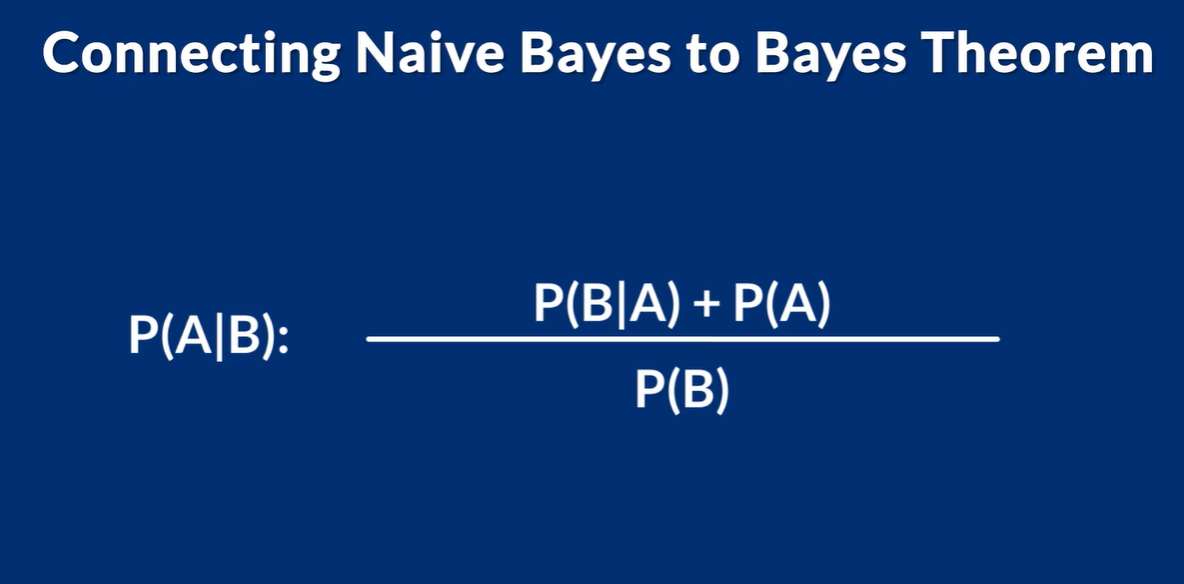

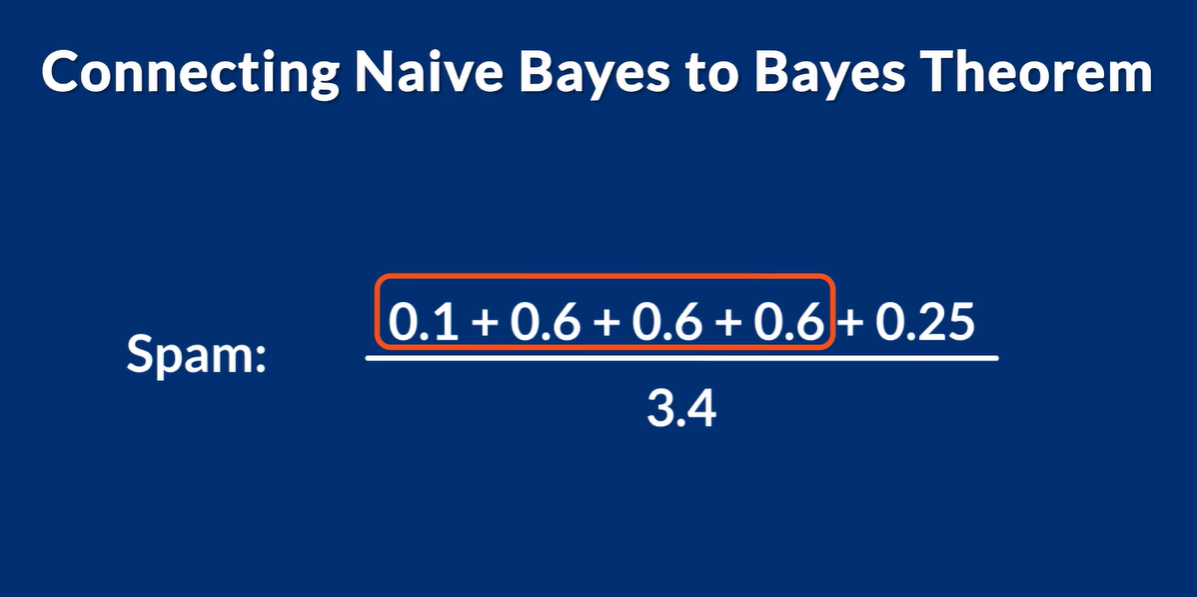

- First, we explored a simple use case. We looked at the email data we used to train our multinomial Naive Bayes model.
- Second, we calculated the probability of an email being spam given the math that underpin multinomial Naive Bayes. Using this method, we determined that there was a 62.3% chance that the sample email was spam.
- Third, we examined the connection between multinomial Naive Bayes and Bayes' Theorem. We learned that we actually used Bayes' Theorem to calculate the probability that an email is spam.

# 3. Preparing Multinomial Naive Bayes Model

In [1]:
import pandas as pd
news_articles_dataset = pd.read_csv("news_articles.csv")
news_articles_dataset.head()

Topic                                              Title  \
0  Business                  Fears for T N pension after talks   
1  Sci/Tech  The Race is On: Second Private Team Sets Launc...   
2  Sci/Tech      Ky. Company Wins Grant to Study Peptides (AP)   
3  Sci/Tech      Prediction Unit Helps Forecast Wildfires (AP)   
4  Sci/Tech        Calif. Aims to Limit Farm-Related Smog (AP)   

                                            Subtitle  
0  Unions representing workers at Turner   Newall...  
1  SPACE.com - TORONTO, Canada -- A second\team o...  
2  AP - A company founded by a chemistry research...  
3  AP - It's barely dawn when Mike Fitzpatrick st...  
4  AP - Southern California's smog-fighting agenc...

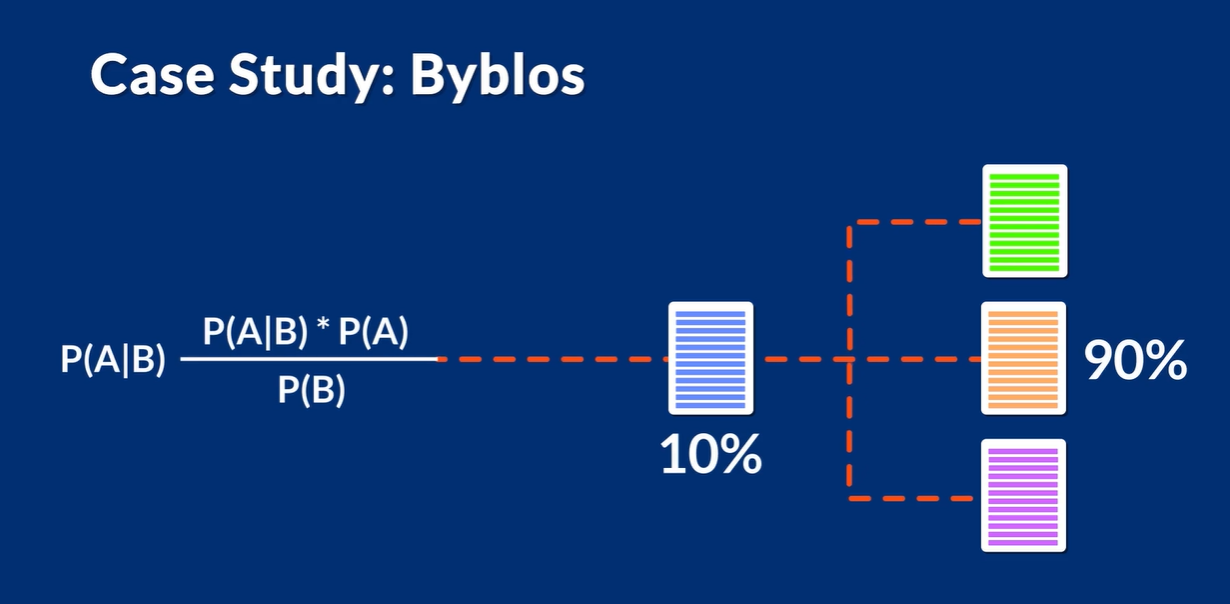

In [2]:
response = news_articles_dataset[["Topic"]]
predictor = news_articles_dataset["Subtitle"]

from sklearn.model_selection import train_test_split

predictor_train, predictor_test, response_train, response_test = train_test_split(
    predictor, response, test_size=0.20, random_state=99)

In [3]:
print(predictor_train.shape)
print(predictor_test.shape)
print(response_train.shape)
print(response_test.shape)

(102080,)
(25520,)
(102080, 1)
(25520, 1)


In [4]:
predictor_train.head()

34189    Prime Minister John Howard has stood firm agai...
32618    PROVIDENCIALES, Turks  amp; Caicos Islands -- ...
62548    Canadian Press - MOSCOW (CP) - A Canadian repo...
26220    Baltimore's Sidney Ponson held the Yankees to ...
3371     Nokia Corp. has no immediate plans to use Inte...
Name: Subtitle, dtype: object

In [5]:
predictor_test.head()

47530     As much as the Red Sox relished thumping the Y...
49485     AP - Roy Oswalt became the NL's first 19-game ...
104326    The Federal Communications Commission says in ...
76398     Prime Minister John Howard has added only two ...
76169      TOKYO (Reuters) - As the death toll rose from...
Name: Subtitle, dtype: object

In [6]:
response_train.head()

Topic
34189     World
32618     World
62548     World
26220    Sports
3371   Sci/Tech

In [7]:
response_test.head()

Topic
47530     Sports
49485     Sports
104326  Business
76398      World
76169      World

# 4. Building a Multinomial Naive Bayes Model

In [8]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(predictor_train, response_train)
predicted_topics = model.predict(predictor_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [9]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(response_test, predicted_topics)
mat

array([[5507,  637,   73,  220],
       [ 515, 5618,   92,  240],
       [  38,   47, 6182,   68],
       [ 325,  181,  214, 5563]], dtype=int64)

- First, we trained the model using the training dataset.
- Second, we made predictions using the predict method on the predictors dataset.
- Third, we built a confusion matrix. We saw that this was a little hard to interpret since it lacked labels and proper spacing.

# 5. Evaluating a Multinomial Naive Bayes Model

In [10]:
text_topics = response["Topic"].unique()
text_topics

array(['Business', 'Sci/Tech', 'Sports', 'World'], dtype=object)

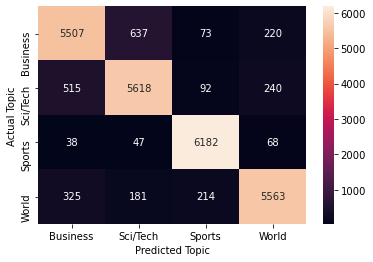

In [11]:
from sklearn.metrics import confusion_matrix,classification_report
from seaborn import heatmap
from matplotlib.pyplot import xlabel,ylabel

matrix = confusion_matrix(response_test, predicted_topics)

heatmap(matrix, annot = True, fmt = "d", xticklabels = text_topics, yticklabels = text_topics)
xlabel("Predicted Topic")
ylabel("Actual Topic");

In [12]:
print(classification_report(response_test, predicted_topics))

              precision    recall  f1-score   support

    Business       0.86      0.86      0.86      6437
    Sci/Tech       0.87      0.87      0.87      6465
      Sports       0.94      0.98      0.96      6335
       World       0.91      0.89      0.90      6283

    accuracy                           0.90     25520
   macro avg       0.90      0.90      0.90     25520
weighted avg       0.90      0.90      0.90     25520



- First, we built a heatmap for the confusion matrix. Using this, we saw that most predictions by the model were correct, although there were some uncommon classification errors.
- Second, we produced precision and recall metrics. We learned that this model had strong precision and recall metrics across the board, demonstrating that the model was useful.

# Gaussian Naive Bayes

# 1. Understanding Gaussian Naive Bayes

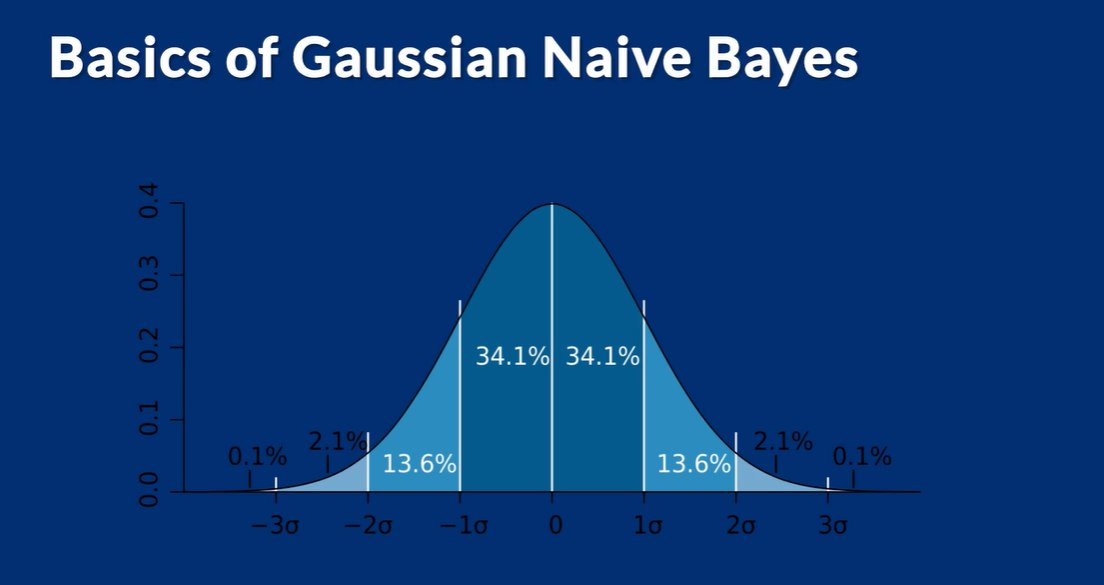

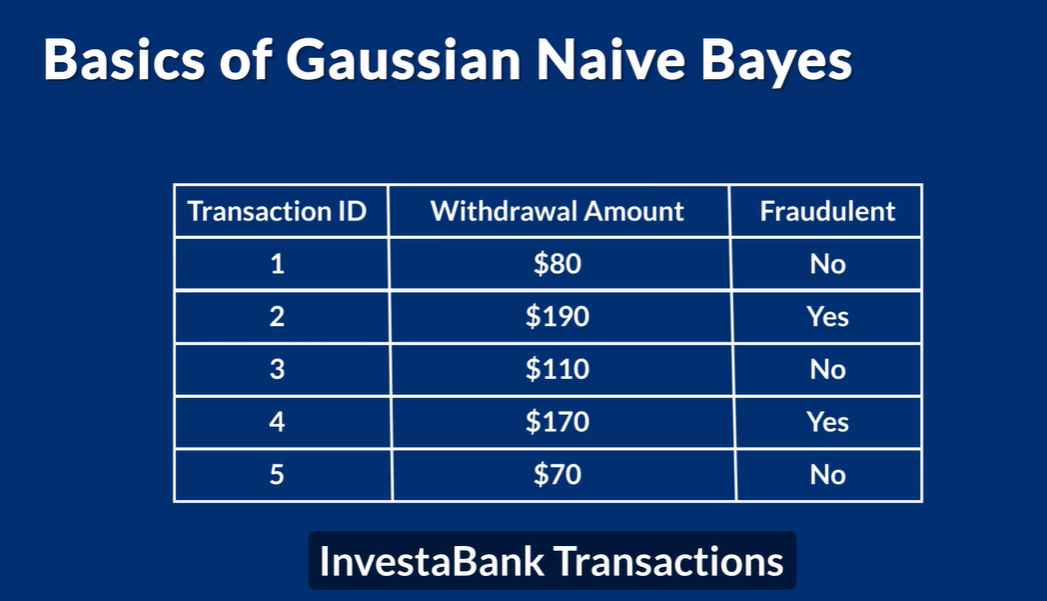

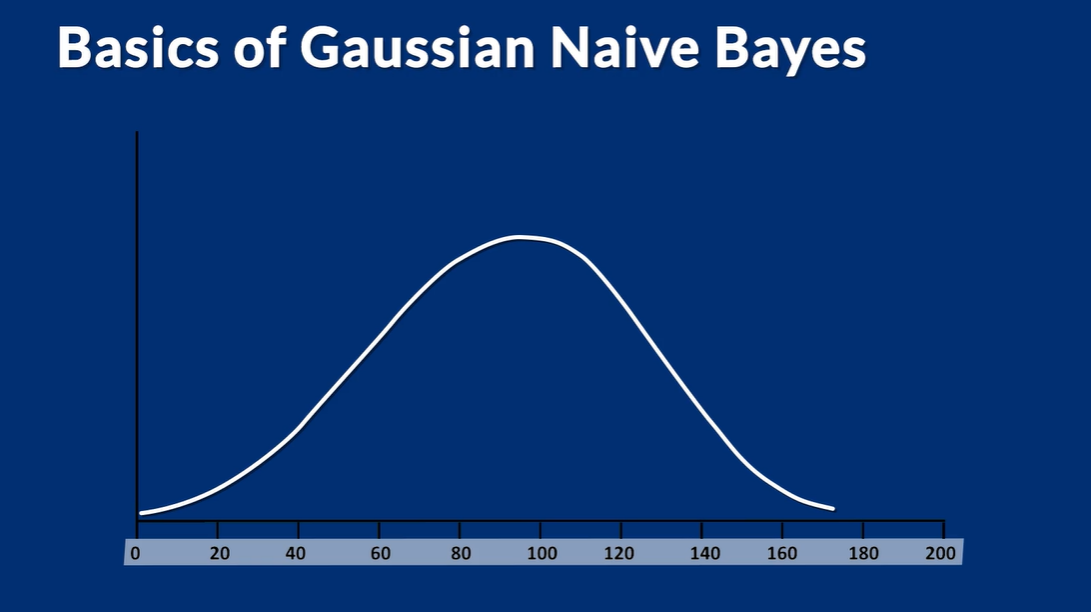

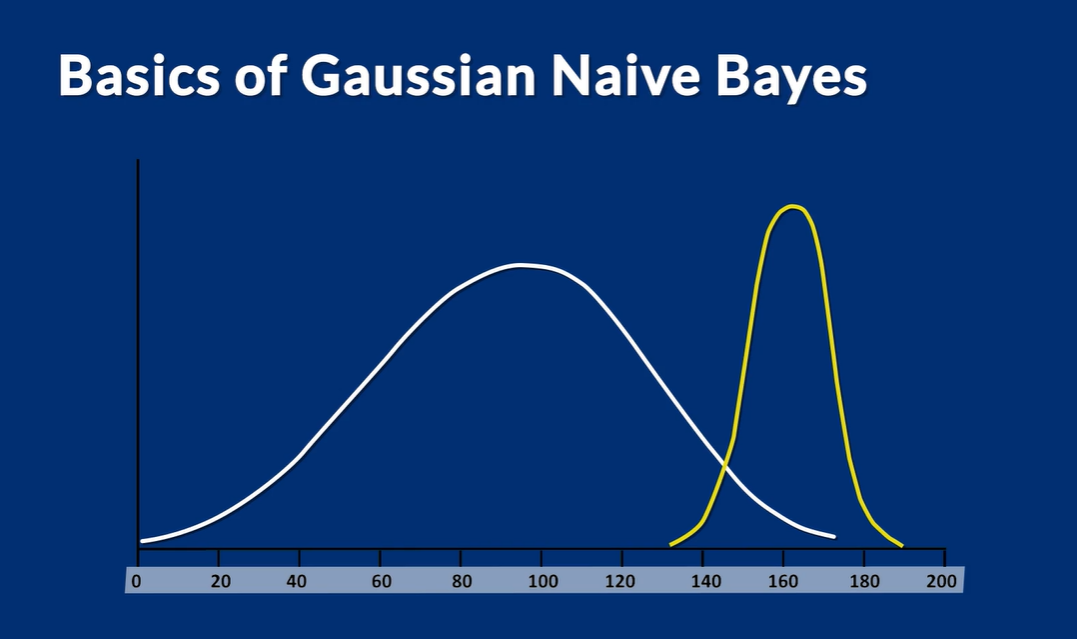

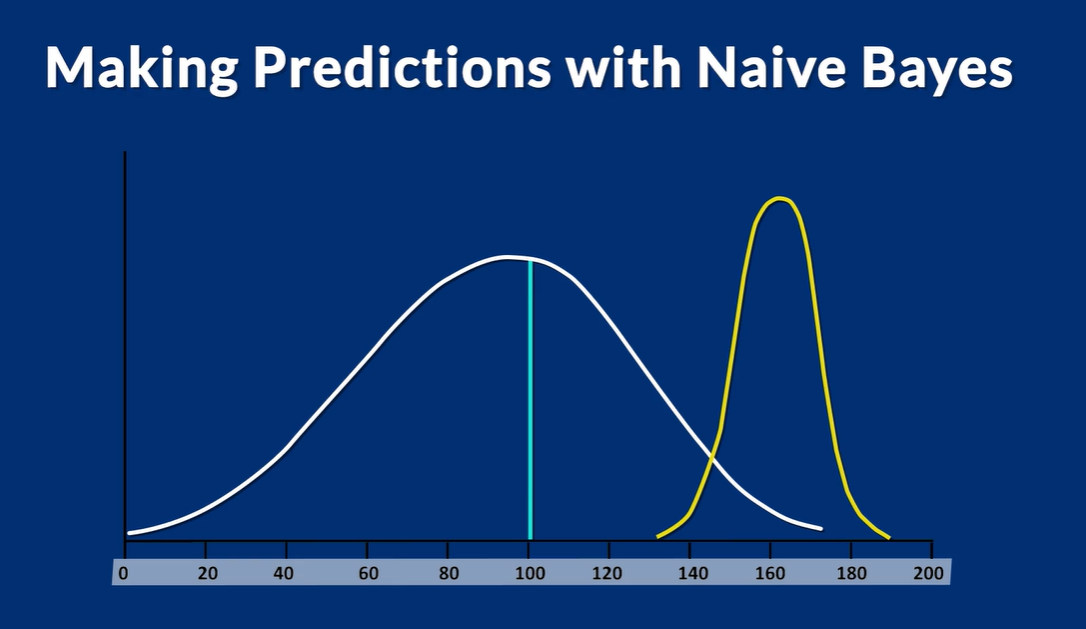

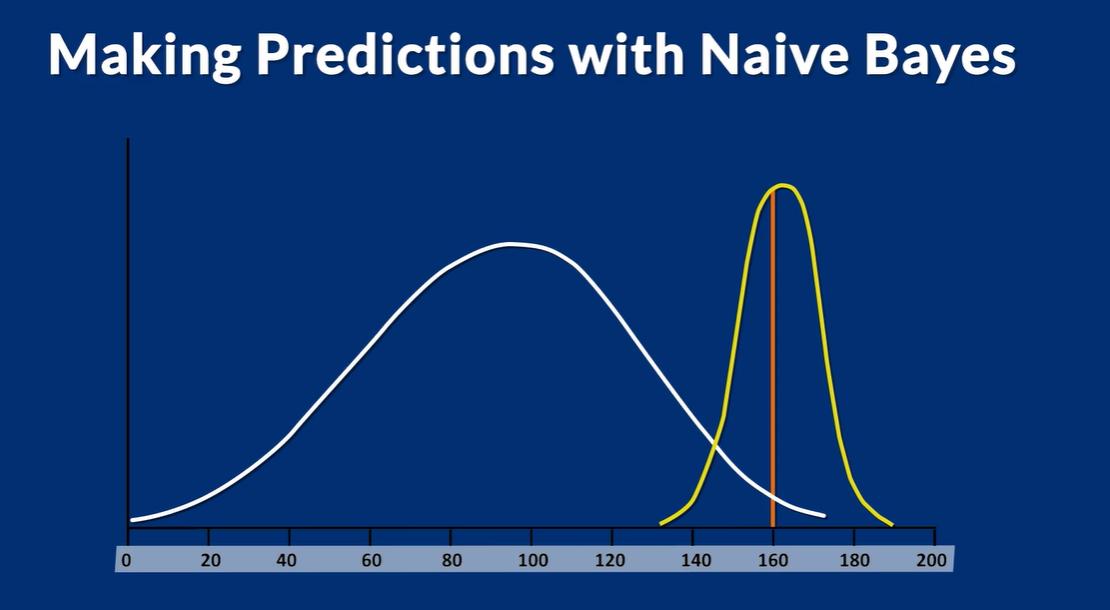

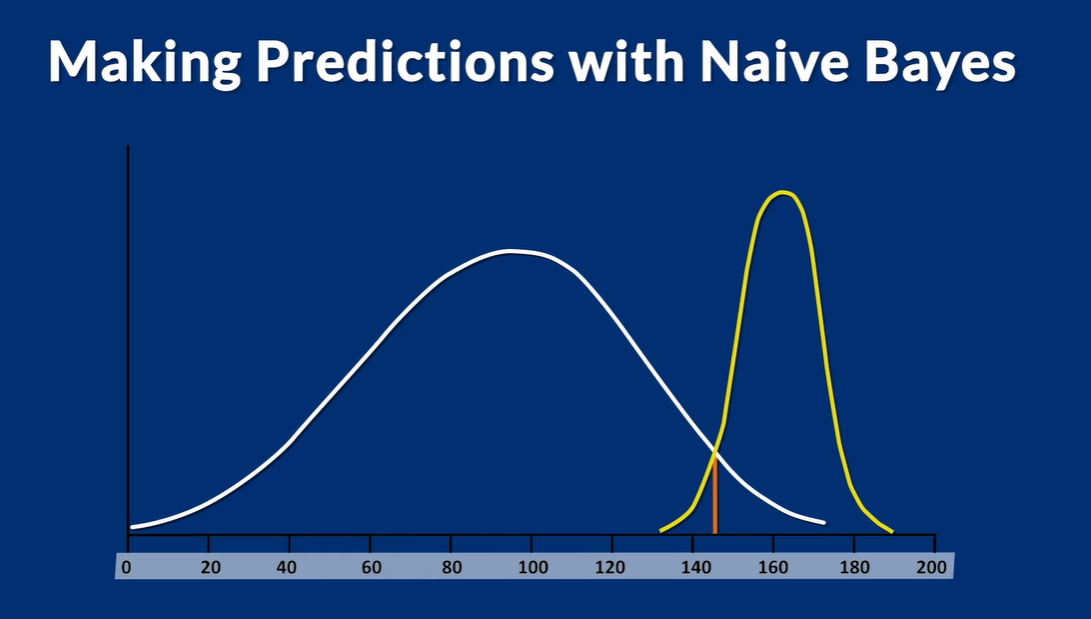

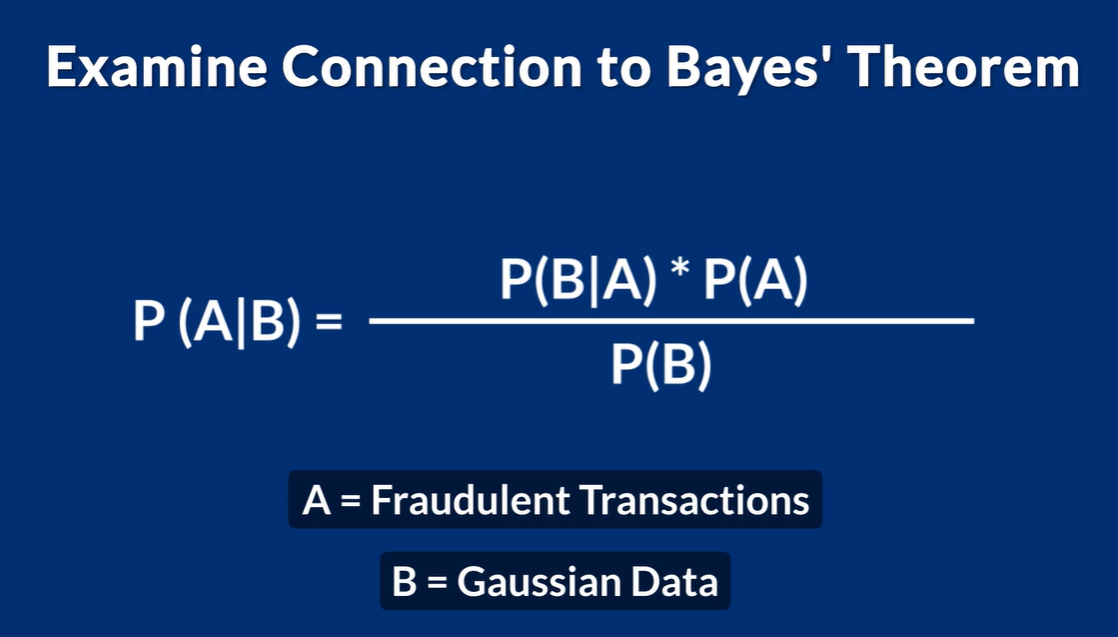

- First, we learned the basics of Gaussian Naive Bayes.
- Second, we made predictions using the same method as Gaussian Naive Bayes. This gave us an intuitive understanding of how this algorithm works without needing to work it out mathematically.
- Third, we examined the connection between Gaussian Naive Bayes and Bayes' theorem.

# 2. Building a Gaussian Naive Bayes Model

In [13]:
import pandas as pd
ads_dataset = pd.read_csv("Social_Network_Ads.csv")
ads_dataset.head()

Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0

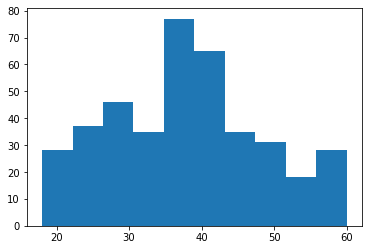

In [14]:
from matplotlib.pyplot import hist

hist(ads_dataset["Age"]);

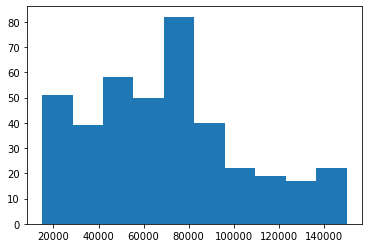

In [15]:
hist(ads_dataset["EstimatedSalary"]);

In [16]:
response=ads_dataset[["Purchased"]]
predictors=ads_dataset[["Age","EstimatedSalary"]]

from sklearn.model_selection import train_test_split

predictors_train, predictors_test, response_train, response_test = train_test_split(
    predictors,response,test_size=0.20,random_state=99)

In [17]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(predictors_train, response_train)
prediction = model.predict(predictors_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [18]:
labels = ["Passed", "Purchased"]

              precision    recall  f1-score   support

      Passed       0.91      0.93      0.92        56
   Purchased       0.83      0.79      0.81        24

    accuracy                           0.89        80
   macro avg       0.87      0.86      0.86        80
weighted avg       0.89      0.89      0.89        80



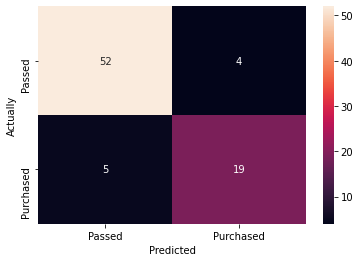

In [19]:
from sklearn.metrics import confusion_matrix,classification_report
from seaborn import heatmap
from matplotlib.pyplot import xlabel,ylabel

mat = confusion_matrix(response_test, prediction)

heatmap(mat, annot = True, fmt = "d", xticklabels = labels, yticklabels = labels)
xlabel("Predicted")
ylabel("Actually");

print(classification_report(response_test, prediction,target_names=labels))

- First, we prepared the data. We identified the response and predictor features, ensured the predictor features were normally distributed and split our data into training and testing sets.
- Second, we trained the model using the training dataset.
- Third, we evaluated the model by examining the confusion matrix, as well as the precision and recall metrics.

# Support Vector Machines

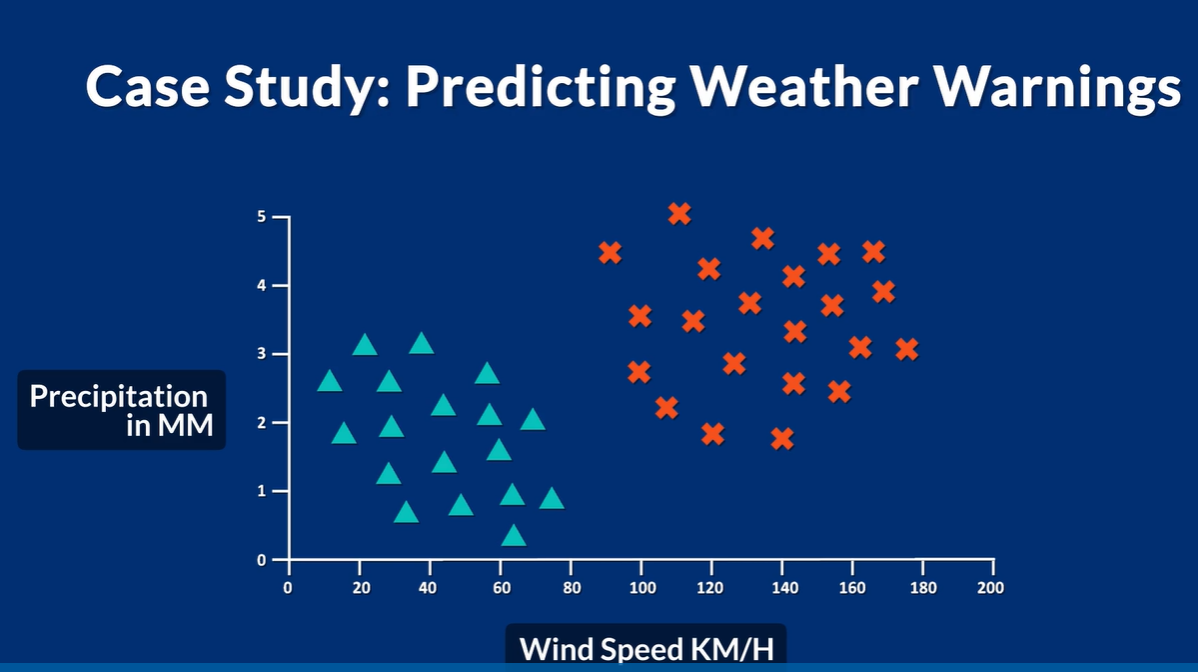

#### SVM differentiates these two sets of data points by plotting a line directly through the plot. This line is called a hyperplane. All the weather warning data points are on one side of the line while the normal days are on the other.

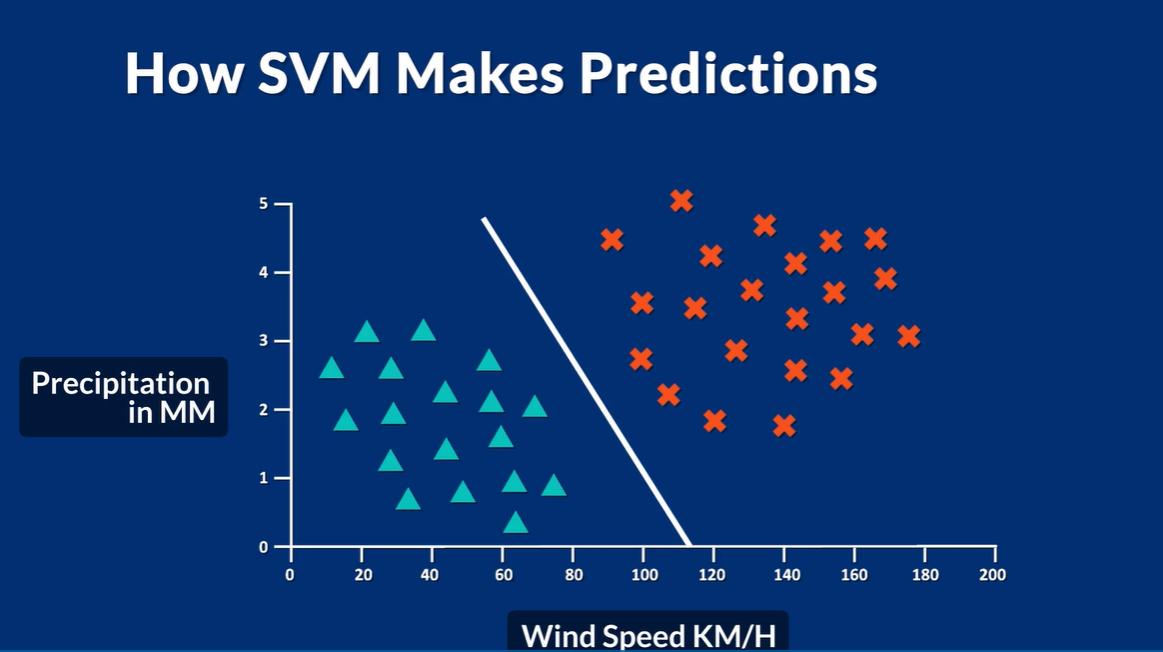

- First, we examined the use case we used to demonstrate SVM. We looked at a simple data set, which we viewed in a scatter plot.
- Second, we learned how SVM builds a model by dividing the data points into two using a line called a hyperplane.

# 1. Comparing SVM kernels

- Sometimes our data is organized in a way that doesn’t allow us to draw a straight line without misclassifying some data points. When this occurs we can use different techniques for plotting a line that isn’t necessarily straight. These techniques are called kernels.

- The first kernal is the linear one which we’ve been using up until now.
- Sometimes we have a few data points that sit just about on the wrong side of the hyperplane. When this is the case, we can use the poly kernel. This is a slightly more flexible kernel that can bend the hyperplane slightly in one or two directions to ensure that borderline data points are on the right side.
- But sometimes even the poly kernel won’t cut it. When that’s the case we can use the RBF kernel (radial basis function). This can accommodate as many twists and turns as we want to fit the data.

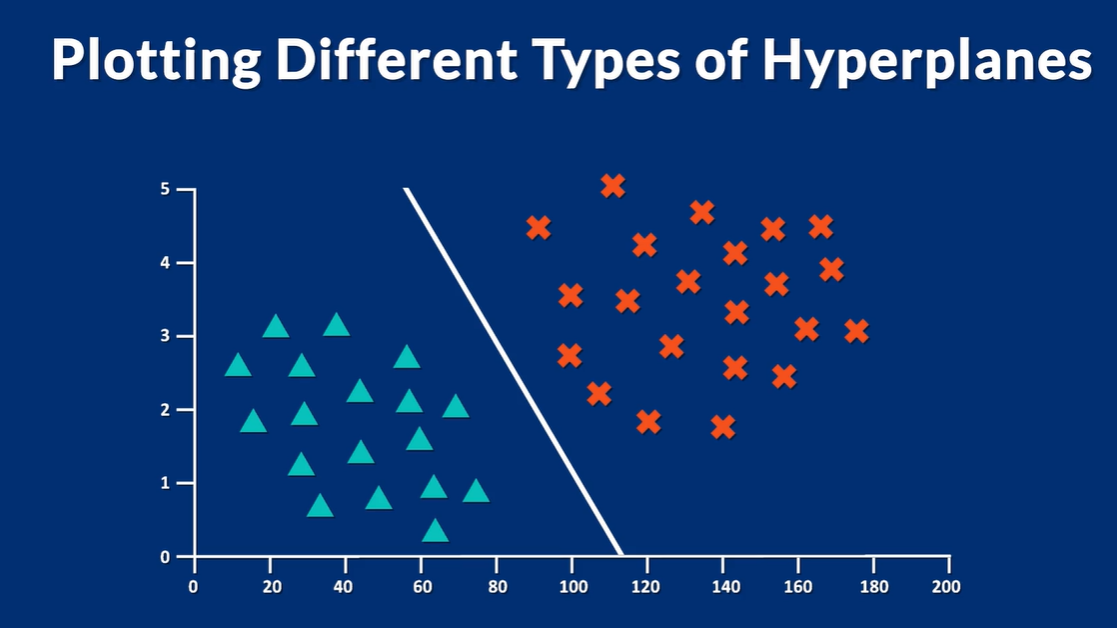

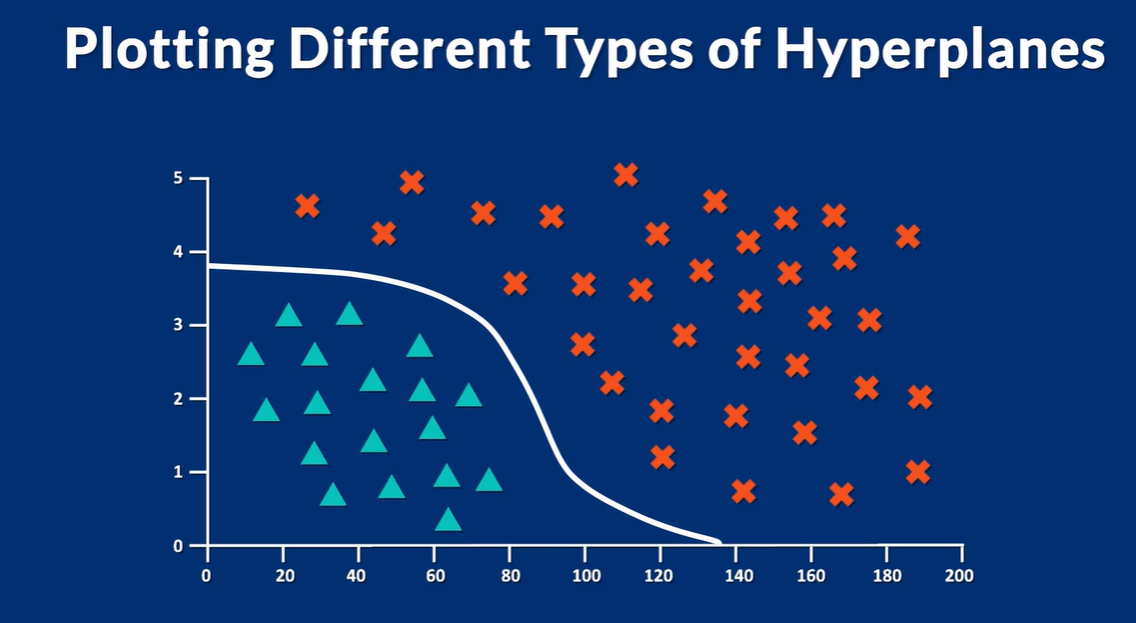

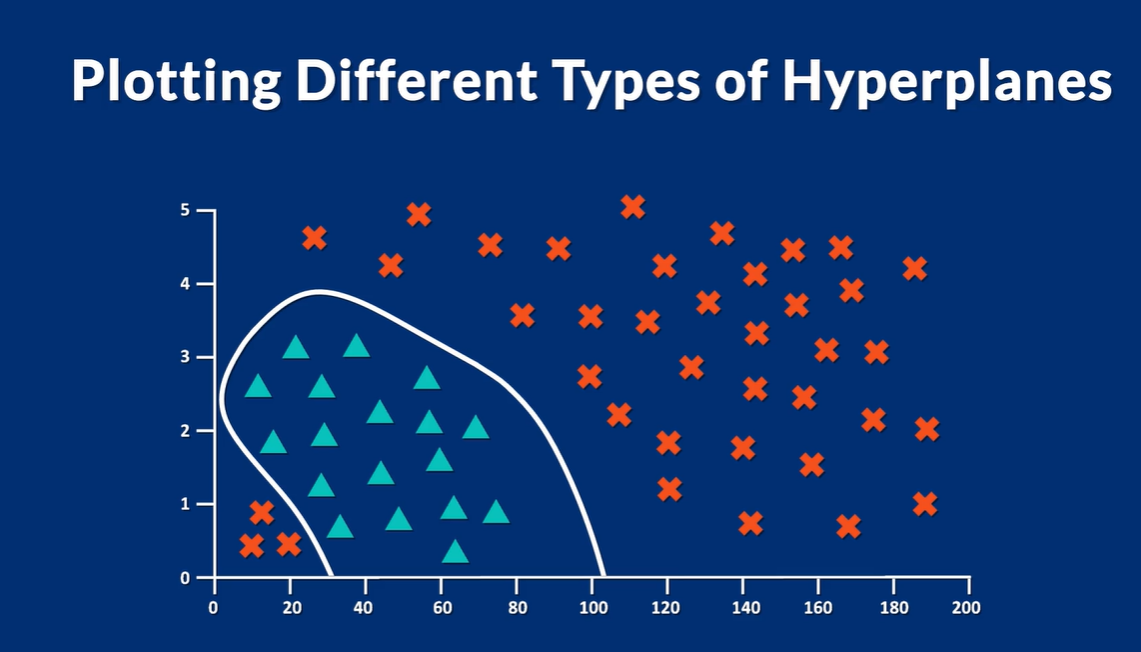

# 2. Adjusting Gamma Parameter

- One thing we haven’t discussed until now is that the hyperplane’s position isn’t determined by all the data points in our dataset. It starts by plotting margins that encompass a roughly even number of data points from both classes.
- However, the width of these margins isn’t set in stone. We can adjust them to be narrower (thereby including fewer data points) or wider (thereby including more data points). We can make these adjustments by adjusting a value called Gamma. The larger this value the narrower the margins.

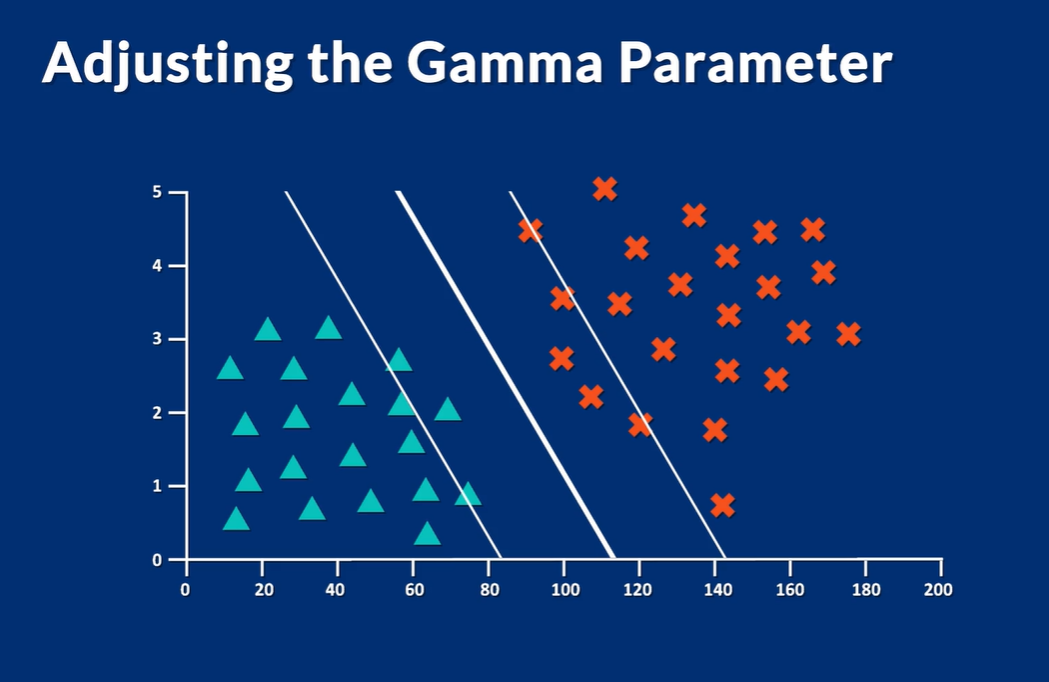

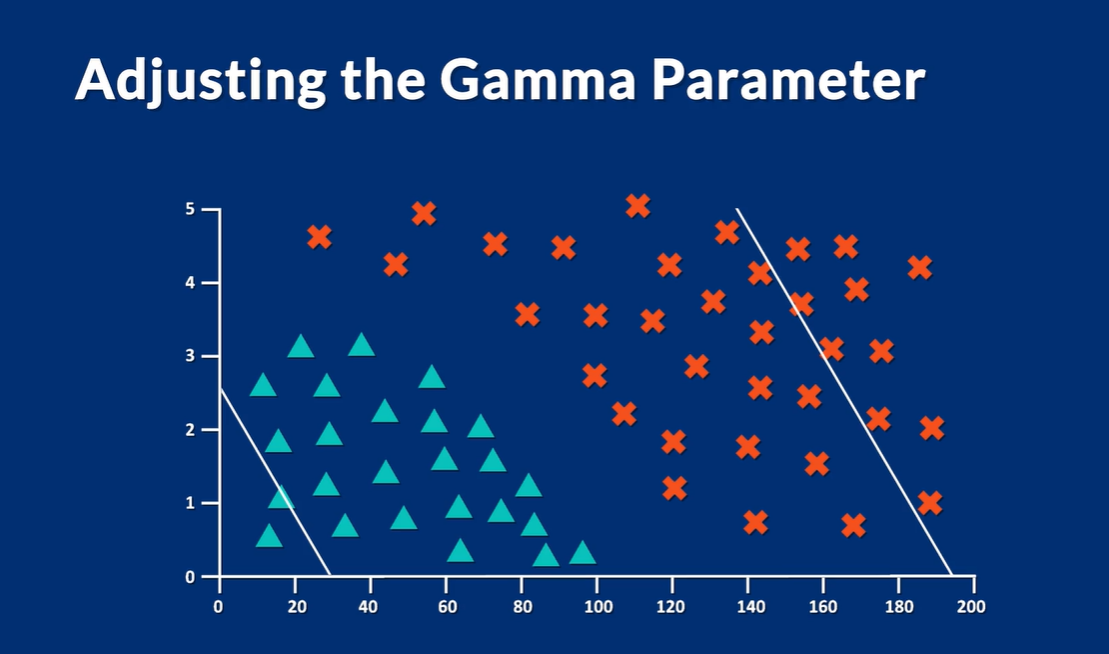

# 3. Adjusting C Parameter

- Another value we can adjust to improve the performance of the model is the C parameter. By increasing the C value, the line can loop and curve around data points to ensure that they’re on the right side of the kernel.

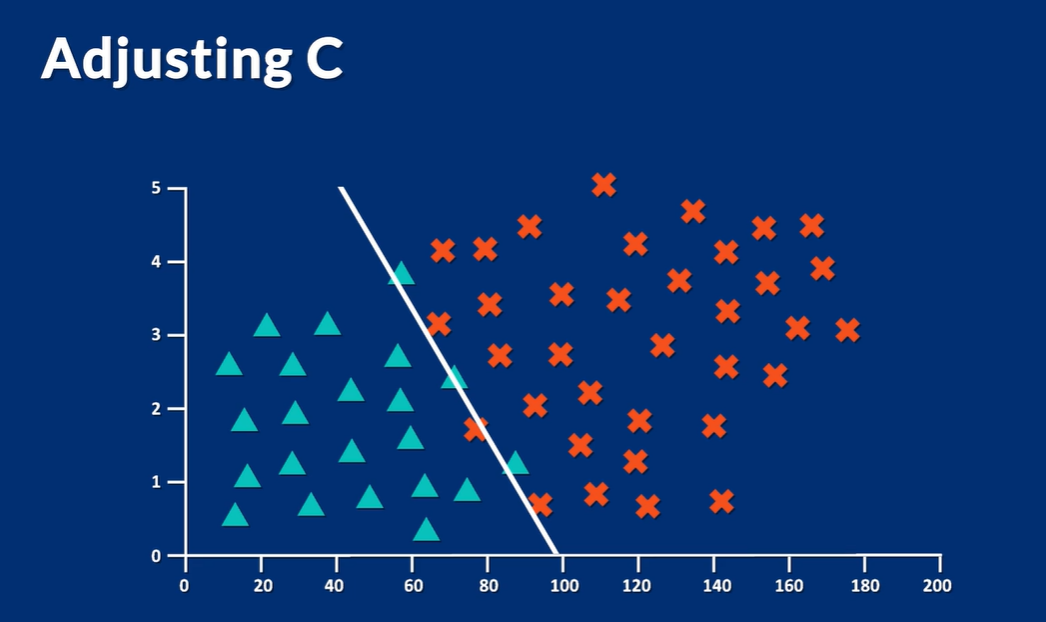

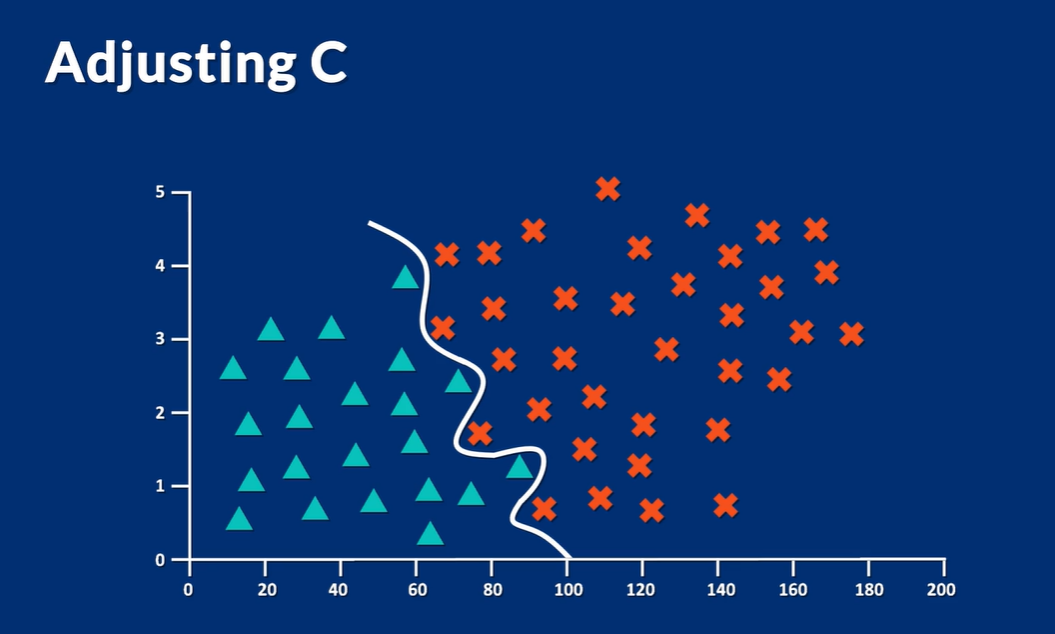

- First, we compared SVM kernels. We learned that poly can bend somewhat to fit data that can't be separated with a straight line and that RBF can bend even more.
- Second, we adjusted the gamma parameter. We saw that by decreasing gamma, the SVM margins widen to include more data points. We even saw an example where doing this made the performance of the model worse.
- Third, we adjusted the C parameter. We learned that by increasing C we can make the hyper plane shift around data points to ensure that they're on the correct side of the hyperplane but we also learn that there's a tradeoff here as a model with a high value for C might not generalize well for new data. In the next lesson, we'll learn how to deploy an SVM model in Python.

# Building a Support Vector Machine Model

In [20]:
import pandas as pd
ads_dataset = pd.read_csv("Social_Network_Ads.csv")
ads_dataset.head()

Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0

In [21]:
response=ads_dataset[["Purchased"]]
predictors=ads_dataset[["Age","EstimatedSalary"]]

from sklearn.model_selection import train_test_split

predictors_train, predictors_test, response_train, response_test = train_test_split(
    predictors,response,test_size=0.20,random_state=99)

              precision    recall  f1-score   support

      Passed       0.85      0.84      0.85        56
   Purchased       0.64      0.67      0.65        24

    accuracy                           0.79        80
   macro avg       0.75      0.75      0.75        80
weighted avg       0.79      0.79      0.79        80



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


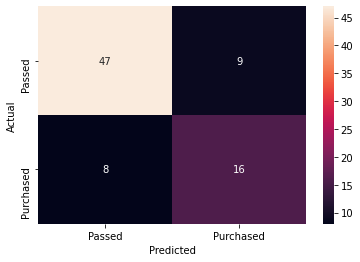

In [22]:
from sklearn.svm import SVC

model = SVC(gamma=0.00045, C=600)
model.fit(predictors_train, response_train)
prediction = model.predict(predictors_test)

labels=["Passed","Purchased"]
from sklearn.metrics import confusion_matrix,classification_report
from seaborn import heatmap
from matplotlib.pyplot import xlabel,ylabel

mat = confusion_matrix(response_test, prediction)

heatmap(mat, annot = True, fmt = "d", xticklabels = labels, yticklabels = labels)
xlabel("Predicted")
ylabel("Actual");

print(classification_report(response_test, prediction,target_names=labels))

- First, we learned about Naive Bayes. This is an algorithm based on basis theorem, which is a form of conditional probability.
- We also learned that there are two forms of Naive Bayes. We learned how multinomial Naive Bayes is often used for text classification, and Gaussian Naive Bayes is useful when our predictor features are numeric.
- We then learned about support vector machines and how it can classify binary data.
- We saw how it plots a line through our data to separate it into two.
- We also learned about some of the different SVM kernels and how to adjust the margins with the gamma perimeter and the straightness of the line with the C perimeter.
- With a solid understanding of these models, you'll find that you'll have a useful model for any classification scenario and any type of dataset.